<a href="https://colab.research.google.com/github/Priyansh-aggarwal-18/Object-Detection-sunig-YOLO/blob/main/yoloobjectdetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install ultralytics
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JK7WvZPH2mzOTOrbicuD")
project = rf.workspace("object-detection-oiwst").project("night-vision-mzy8e-qn1tl")
version = project.version(1)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Night-Vision-1 in yolov8:: 100%|██████████| 9506/9506 [00:01<00:00, 6741.27it/s]


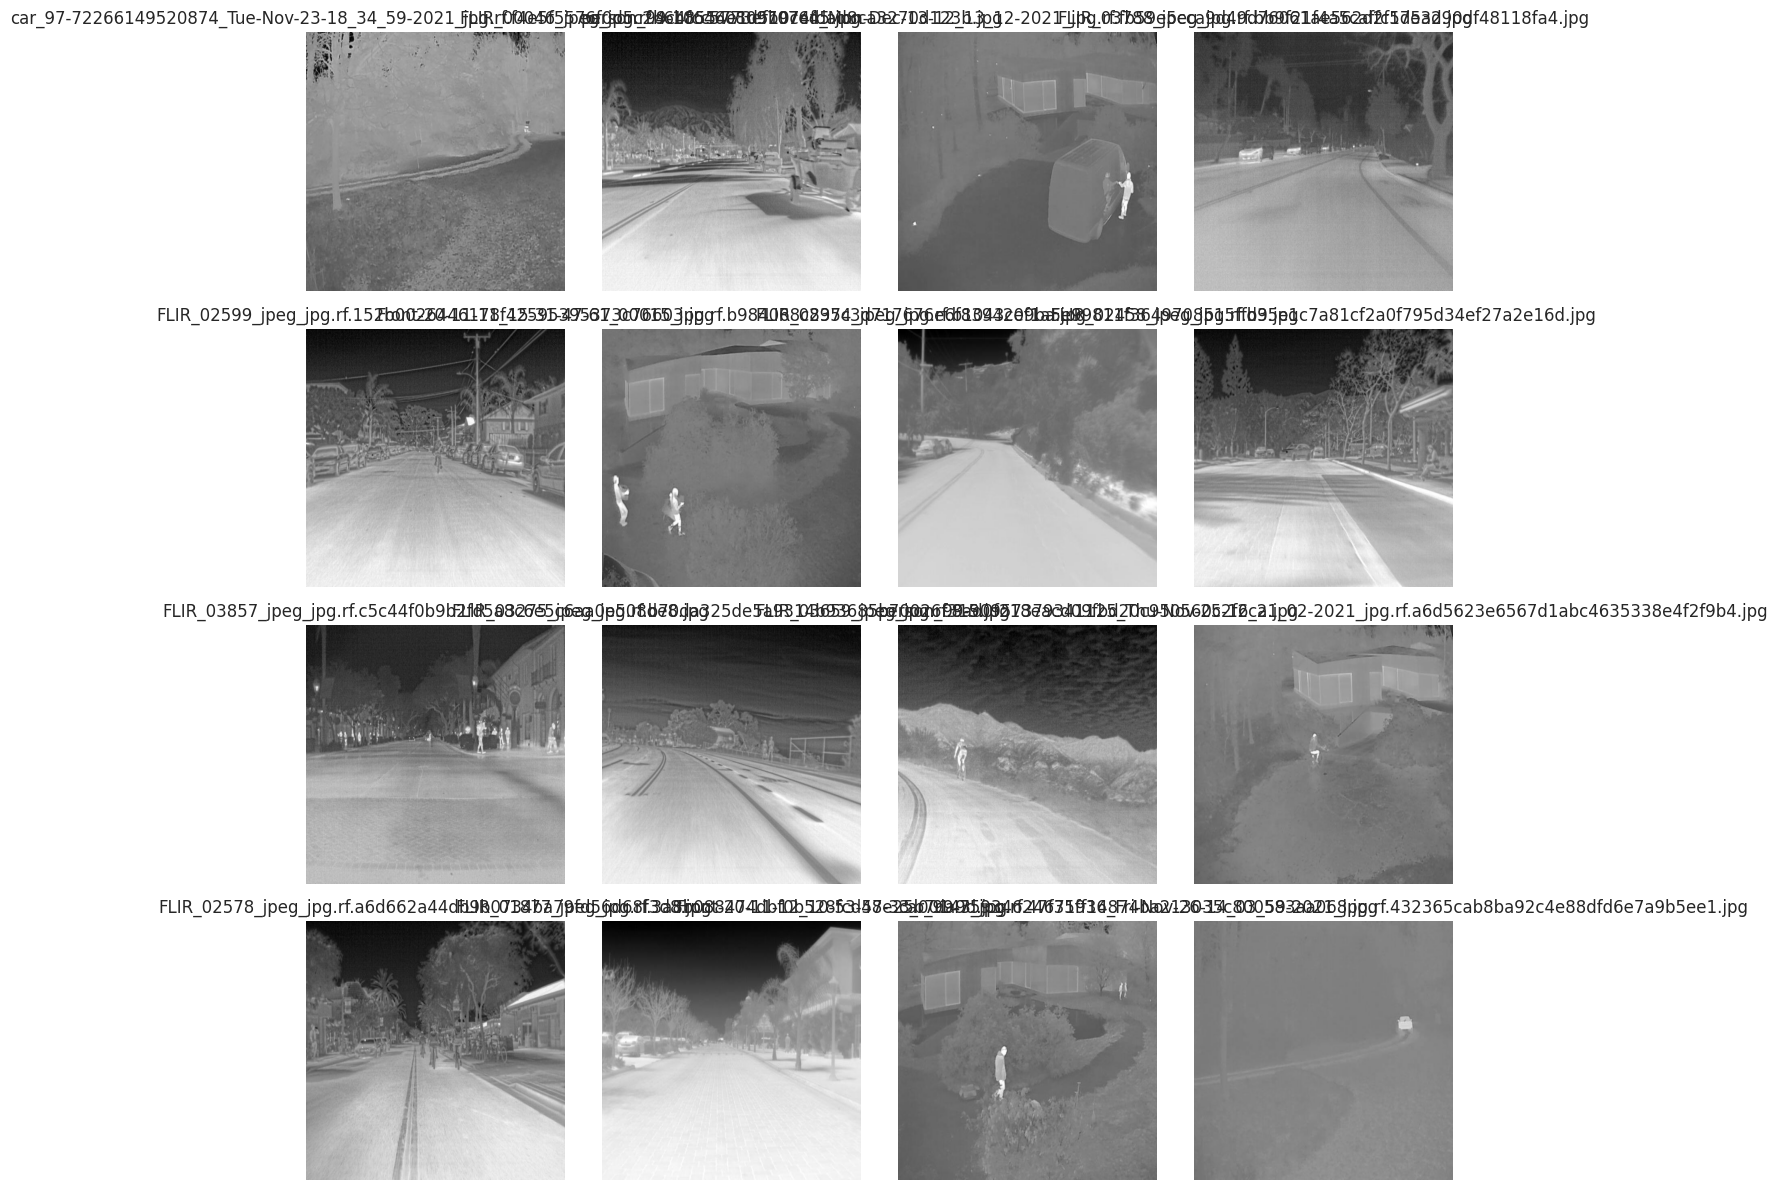

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import cv2

train_images_path = "/content/Night-Vision-1/train/images"

all_train_images = os.listdir(train_images_path)

# Select 16 random images
random_images = random.sample(all_train_images, 16)

# Display the images
plt.figure(figsize=(12, 12))
for i, image_name in enumerate(random_images):
    img_path = os.path.join(train_images_path, image_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(4, 4, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_name)

plt.tight_layout()
plt.show()


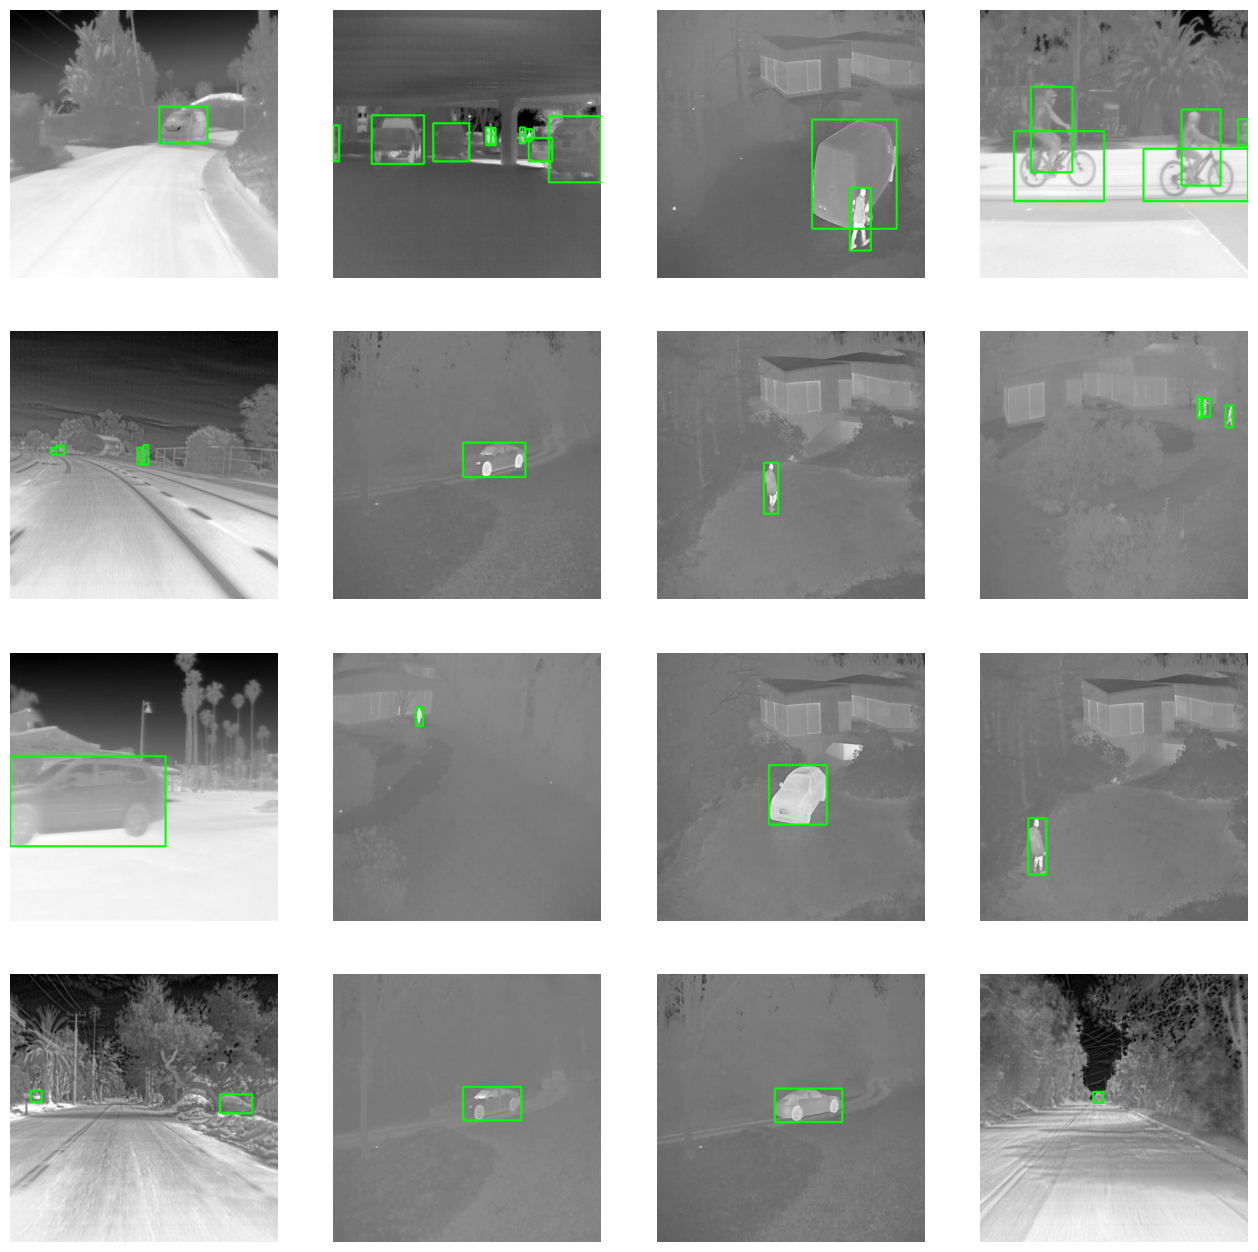

In [ ]:
train_images = "/content/Night-Vision-1/train/images"
train_labels = "/content/Night-Vision-1/train/labels"

test_images = "/content/Night-Vision-1/test/images"
test_labels = "/content/Night-Vision-1/train/labels"

val_images = "/content/Night-Vision-1/valid/images"
val_labels = "/content/Night-Vision-1/valid/labels"

image_files = os.listdir(train_images)
random_images = random.sample(image_files, 16)

fig, axs = plt.subplots(4, 4, figsize=(16, 16))

for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()

In [ ]:
image = cv2.imread("/content/Night-Vision-1/test/images/FLIR_00005_jpeg_jpg.rf.bd1d9dc40369b7ed30809b76923cec9e.jpg")

height, width, channels = image.shape
print(f"The image has dimensions {width}x{height} and {channels} channels.")

The image has dimensions 640x640 and 3 channels.


In [ ]:
model = YOLO('yolov8x.pt')

model.train(data = '/content/Night-Vision-1/data.yaml',
            epochs = 30,
            imgsz = 416,
            seed = 42,
            batch = 8,
            workers = 8 )

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/Night-Vision-1/data.yaml, epochs=30, time=None, patience=100, batch=8, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sh

train: Scanning /content/Night-Vision-1/train/labels.cache... 2973 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2973/2973 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/Night-Vision-1/valid/labels.cache... 1006 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1006/1006 [00:00<?, ?it/s]


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      4.59G      1.418      1.277      1.145         10        416: 100%|██████████| 372/372 [02:03<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.82it/s]


                   all       1006       5546      0.693      0.174      0.199      0.102

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      3.94G      1.566      1.173      1.223         27        416: 100%|██████████| 372/372 [01:59<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.66it/s]


                   all       1006       5546      0.528      0.152      0.178     0.0856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      3.98G      1.569      1.146       1.24         70        416: 100%|██████████| 372/372 [01:58<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.72it/s]

                   all       1006       5546      0.637        0.2      0.226      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      3.97G      1.524      1.109      1.205         17        416: 100%|██████████| 372/372 [01:59<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.84it/s]

                   all       1006       5546      0.722      0.174      0.231      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         4G      1.505      1.037      1.204         23        416: 100%|██████████| 372/372 [01:58<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.81it/s]

                   all       1006       5546      0.739      0.194      0.281      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         4G      1.466     0.9988      1.167         16        416: 100%|██████████| 372/372 [01:57<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:18<00:00,  3.50it/s]

                   all       1006       5546      0.471      0.278       0.29      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         4G      1.401     0.9292       1.15         22        416: 100%|██████████| 372/372 [01:57<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.56it/s]

                   all       1006       5546      0.722      0.225      0.307      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      4.01G      1.377     0.9114      1.132         29        416: 100%|██████████| 372/372 [01:58<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.79it/s]

                   all       1006       5546      0.737      0.244      0.322      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      4.01G       1.38     0.8863      1.131         23        416: 100%|██████████| 372/372 [01:58<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.77it/s]

                   all       1006       5546      0.531      0.261      0.314      0.163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         4G      1.345     0.8632      1.116         58        416: 100%|██████████| 372/372 [01:58<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.61it/s]

                   all       1006       5546      0.661      0.271      0.342      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         4G      1.307     0.8341      1.099         20        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.55it/s]

                   all       1006       5546      0.657      0.274      0.358      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         4G      1.278     0.7935      1.089         40        416: 100%|██████████| 372/372 [01:58<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.86it/s]

                   all       1006       5546      0.365      0.323      0.357      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      4.01G      1.286     0.7885      1.082         50        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.85it/s]

                   all       1006       5546      0.553      0.305      0.371      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         4G      1.263     0.7681      1.074         25        416: 100%|██████████| 372/372 [01:58<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.82it/s]

                   all       1006       5546      0.545      0.317      0.374      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         4G      1.234     0.7504      1.062         10        416: 100%|██████████| 372/372 [01:58<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.87it/s]

                   all       1006       5546      0.498      0.351      0.382      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      4.02G      1.204     0.7233      1.052         17        416: 100%|██████████| 372/372 [01:58<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.86it/s]

                   all       1006       5546      0.609      0.301      0.357      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      4.02G      1.224     0.7295      1.056         48        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.85it/s]

                   all       1006       5546      0.471      0.343      0.385      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      4.01G      1.209     0.7079      1.051         39        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.84it/s]

                   all       1006       5546      0.565      0.329      0.397      0.203



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      4.01G      1.168     0.6875       1.03         16        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.72it/s]

                   all       1006       5546      0.562      0.349      0.423      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      4.02G       1.16     0.6733      1.026         20        416: 100%|██████████| 372/372 [01:57<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.69it/s]

                   all       1006       5546      0.413      0.403      0.397      0.208


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      3.99G      1.148     0.6444      1.026         15        416: 100%|██████████| 372/372 [01:57<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.83it/s]

                   all       1006       5546      0.441      0.369        0.4      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         4G      1.125     0.6217      1.018         27        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.84it/s]

                   all       1006       5546      0.455      0.372      0.411      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      4.01G       1.11     0.6112      1.005         17        416: 100%|██████████| 372/372 [01:58<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.86it/s]

                   all       1006       5546      0.426      0.376      0.403      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         4G      1.105     0.5985      1.003         19        416: 100%|██████████| 372/372 [01:57<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.84it/s]

                   all       1006       5546      0.429      0.388      0.418      0.225



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      4.01G      1.085     0.5845     0.9938         11        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.84it/s]

                   all       1006       5546      0.473       0.34      0.395      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      4.01G      1.078     0.5801     0.9893         25        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.87it/s]

                   all       1006       5546      0.449      0.386      0.411       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         4G       1.05     0.5619     0.9754         12        416: 100%|██████████| 372/372 [01:57<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.86it/s]

                   all       1006       5546      0.458      0.395      0.411      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         4G      1.048     0.5472      0.977         19        416: 100%|██████████| 372/372 [01:58<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:23<00:00,  2.64it/s]

                   all       1006       5546      0.511      0.371      0.417      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         4G      1.033     0.5321     0.9692         42        416: 100%|██████████| 372/372 [01:58<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.79it/s]

                   all       1006       5546      0.523      0.384      0.439      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         4G      1.013     0.5225     0.9681         23        416: 100%|██████████| 372/372 [01:57<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:16<00:00,  3.87it/s]

                   all       1006       5546      0.512      0.378      0.437       0.24



30 epochs completed in 1.300 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 136.7MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,131,272 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 63/63 [00:17<00:00,  3.67it/s]


                   all       1006       5546      0.521      0.384      0.439      0.242
               bicycle         83        190      0.777      0.416      0.548      0.253
                   car        703       3144      0.726      0.825      0.853      0.573
                   dog          2          2          0          0          0          0
        other vehicule         19         21      0.667       0.19      0.411      0.218
                person        686       1969      0.683      0.781      0.805      0.466
                  sign         35         48      0.286      0.229      0.187     0.0751
         traffic light         62        172      0.507      0.244      0.272      0.111
Speed: 0.1ms preprocess, 11.4ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/detect/train3


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 4, 5, 6, 7])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fd088554280>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
  

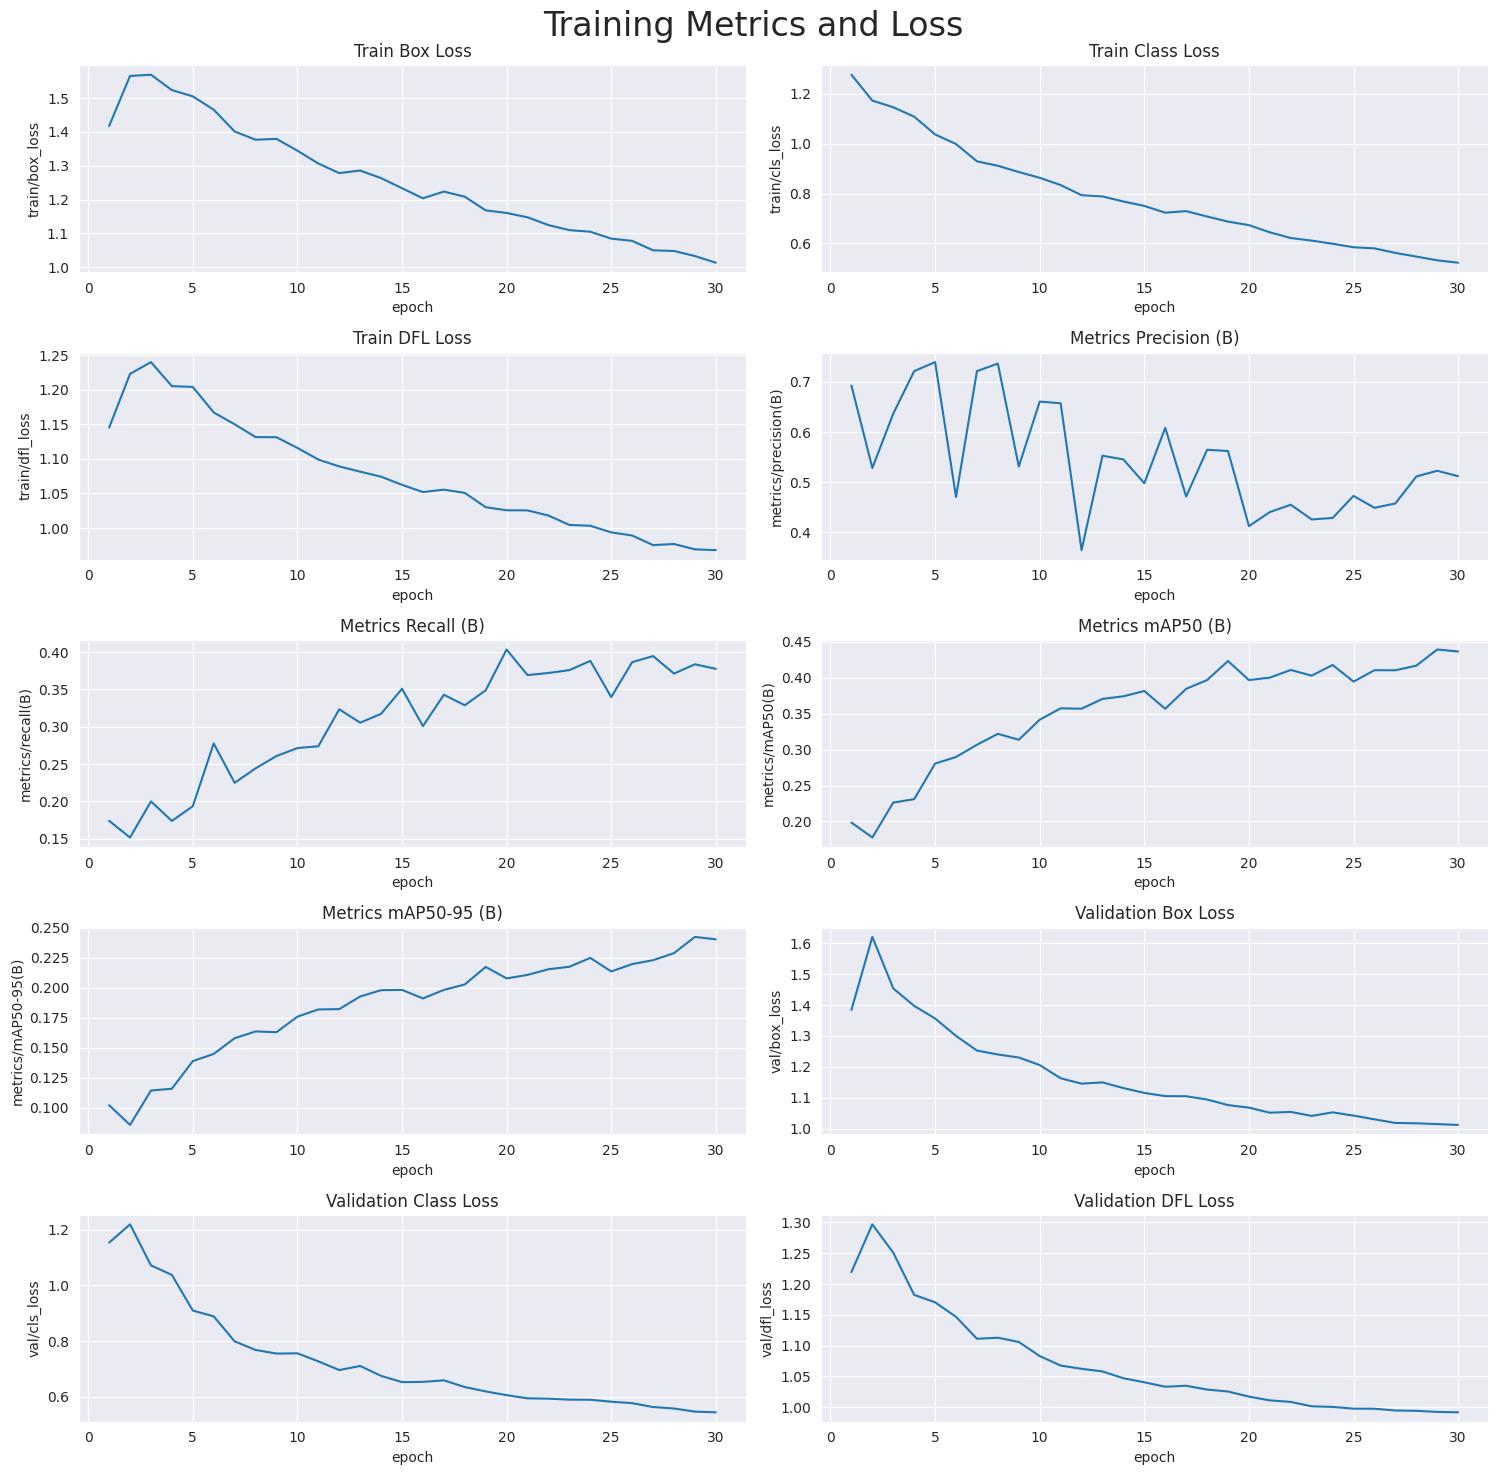

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/runs/detect/train3/results.csv')
df.columns = df.columns.str.strip()

fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)

plt.subplots_adjust(top=0.8)

plt.tight_layout()

plt.show()


In [ ]:
%matplotlib inline
# Loading the best performing model
model = YOLO('/content/runs/detect/train3/weights/best.pt')

metrics = model.val(conf = 0.25, split = 'test')

Ultralytics 8.3.51 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68,131,272 parameters, 0 gradients, 257.4 GFLOPs


val: Scanning /content/Night-Vision-1/test/labels.cache... 768 images, 0 backgrounds, 0 corrupt: 100%|██████████| 768/768 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 48/48 [00:26<00:00,  1.79it/s]


                   all        768       4142      0.491      0.302      0.401      0.237
               bicycle         97        196      0.827      0.219       0.52      0.235
                   car        538       2434      0.819      0.771      0.844      0.623
                   dog          3          3          0          0          0          0
        other vehicule         15         19          0          0          0          0
                person        519       1326      0.812      0.755      0.831      0.542
                  sign         25         34        0.5      0.206      0.332      0.143
         traffic light         45        130      0.477      0.162      0.277      0.115
Speed: 0.2ms preprocess, 28.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val4


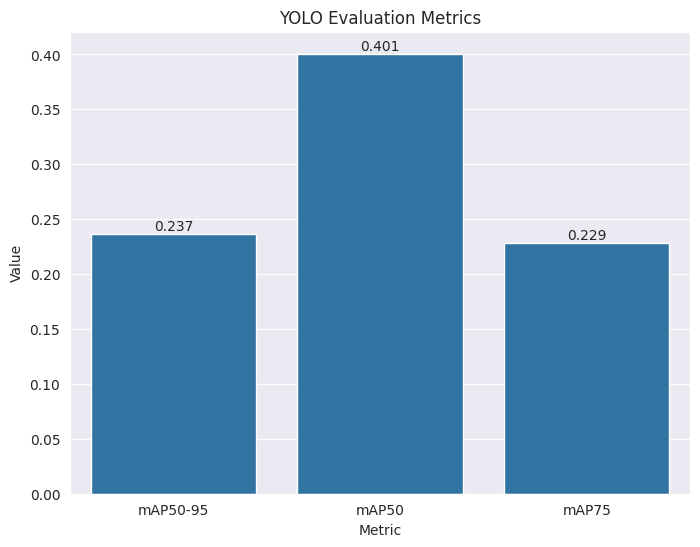

In [ ]:
%matplotlib inline
ax = sns.barplot(x=['mAP50-95', 'mAP50', 'mAP75'], y=[metrics.box.map, metrics.box.map50, metrics.box.map75])

ax.set_title('YOLO Evaluation Metrics')
ax.set_xlabel('Metric')
ax.set_ylabel('Value')

fig = plt.gcf()
fig.set_size_inches(8, 6)

for p in ax.patches:
    ax.annotate('{:.3f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.show()


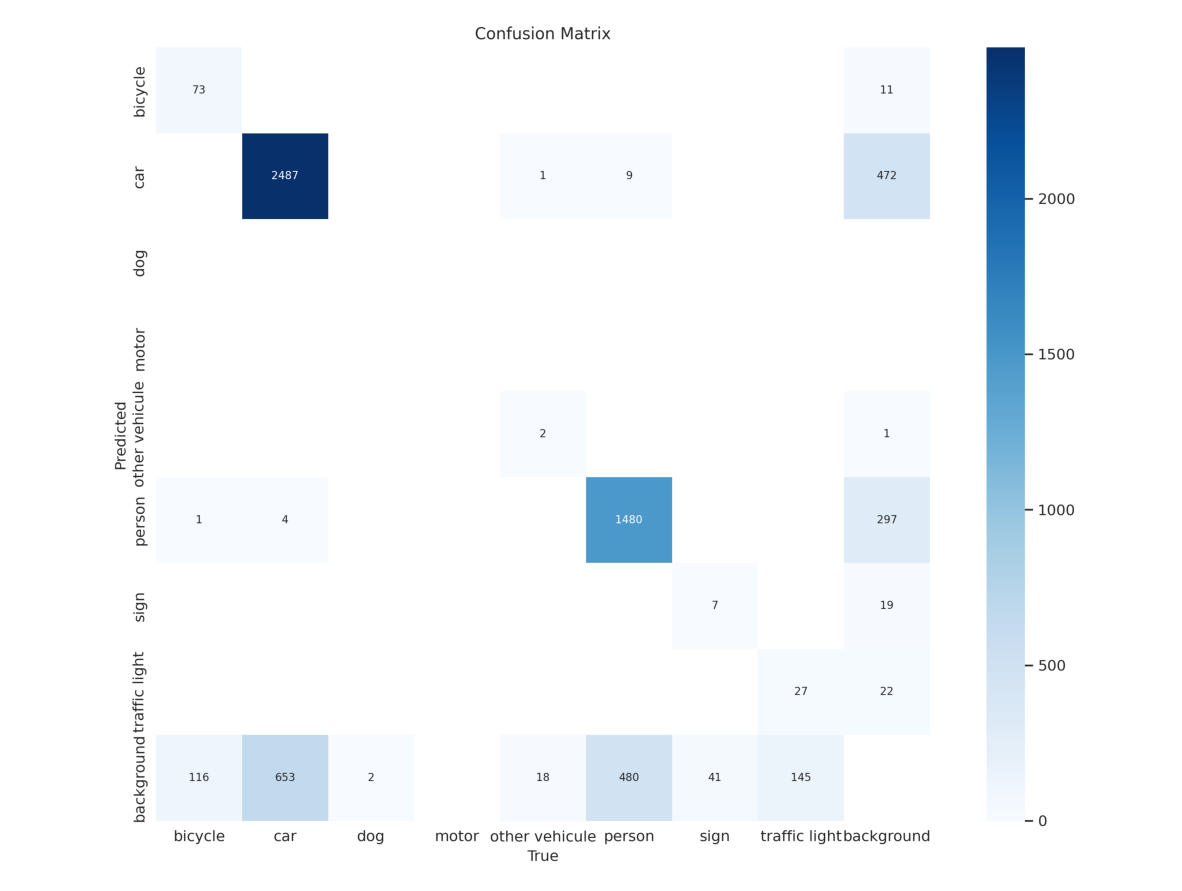

In [ ]:
%matplotlib inline
img = mpimg.imread('/content/runs/detect/train3/confusion_matrix.png')

fig, ax = plt.subplots(figsize = (15, 15))

ax.imshow(img)
ax.axis('off');


In [ ]:
def detect(img_path):

    img = cv2.imread(img_path)

    detect_result = model(img)

    detect_img = detect_result[0].plot()

    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img


0: 416x416 3 persons, 50.7ms
Speed: 1.8ms preprocess, 50.7ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 cars, 4 persons, 49.6ms
Speed: 2.0ms preprocess, 49.6ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 person, 42.5ms
Speed: 1.9ms preprocess, 42.5ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 4 cars, 7 persons, 29.7ms
Speed: 1.9ms preprocess, 29.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 3 persons, 29.7ms
Speed: 2.5ms preprocess, 29.7ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 6 cars, 4 persons, 29.0ms
Speed: 3.3ms preprocess, 29.0ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 person, 28.9ms
Speed: 3.0ms preprocess, 28.9ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 person, 26.9ms
Speed: 2.7ms preprocess, 26.9ms inference, 1.2ms postprocess

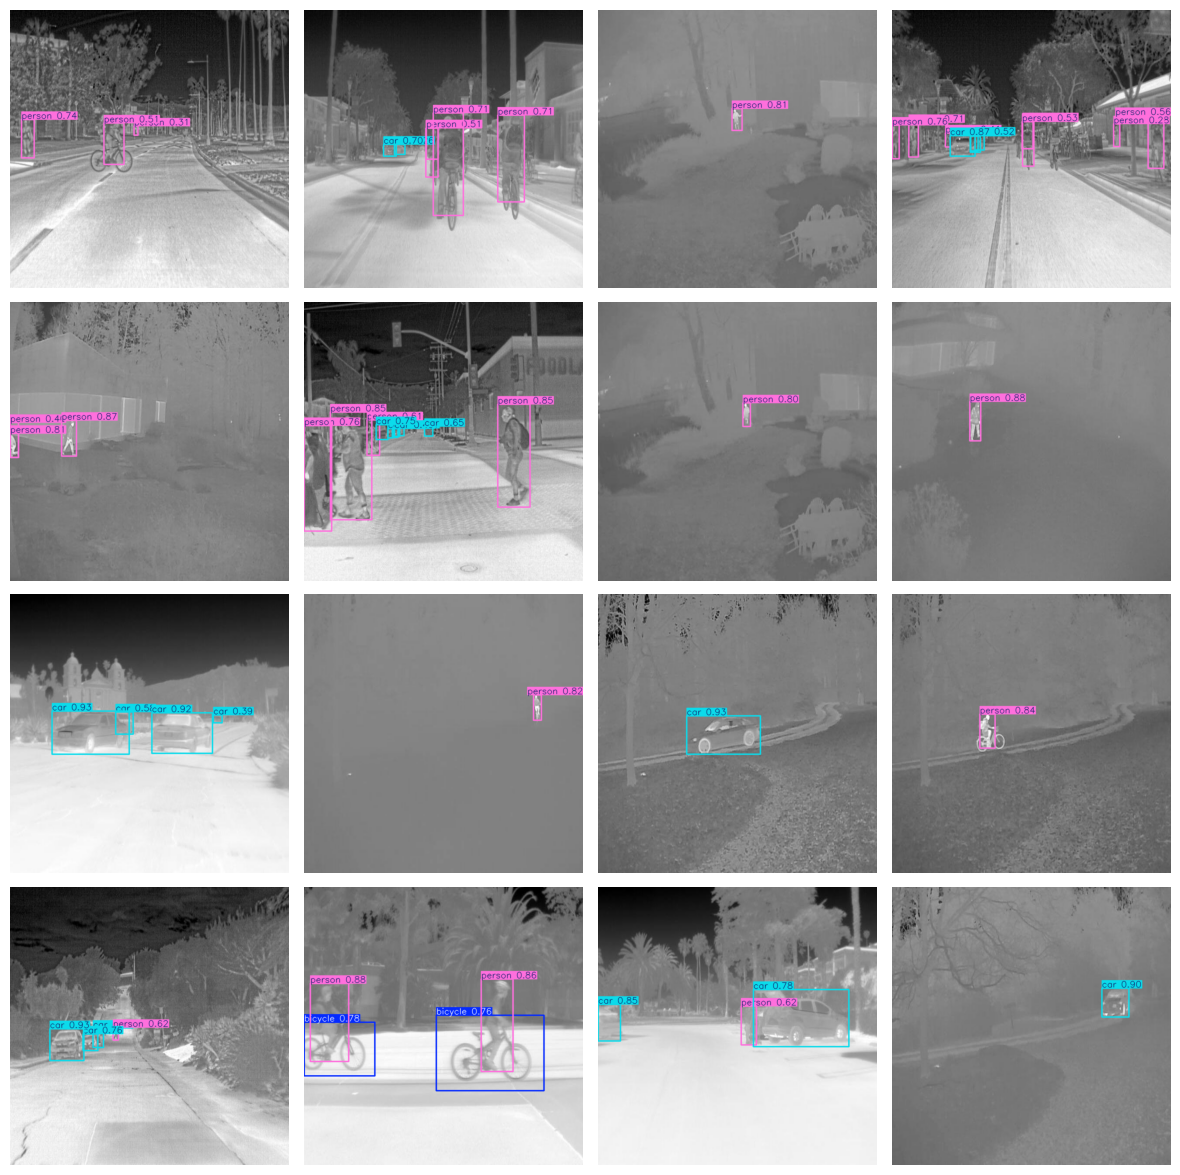

In [ ]:
import random

custom_image_dir = '/content/Night-Vision-1/test/images'

image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4
     # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

plt.subplots_adjust(wspace=0.05, hspace=0.05)